### Trabalhando com data e tempo no Pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
file="C:\\projetos\\ufo.csv"
ufo = pd.read_csv(file)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
# Time é armazenado como string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### Podemos utilizar do método str já ensinado para acessar as posições da data

In [5]:
# Porém essa abordagem não é 100% segura

ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [6]:
# Vamos converter a coluna Time para o formato Datetime

ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [12]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

### Com uma coluna do tipo Datetime, temos métodos muito melhores

In [14]:
# Seleciona a hora

ufo.Time.dt.hour.head(10)

0    22
1    20
2    14
3    13
4    19
5    15
6     0
7     0
8    17
9     0
Name: Time, dtype: int64

In [16]:
# Verificando o dia da semana da data

ufo.Time.dt.weekday_name.head(10)

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [11]:
print(ufo['weekday_name'].head(10))

KeyError: 'weekday_name'

In [17]:
import pandas as pd
ufo = pd.read_csv('ufo.csv')

In [18]:
# Convertendo a coluna 'Time' para o tipo datetime
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [19]:
# Usando o método strftime para formatar a data e extrair o nome do dia da semana
ufo['weekday_name'] = ufo['Time'].apply(lambda x: x.strftime('%A'))

In [20]:
# Exibindo as 10 primeiras linhas com o nome do dia da semana
print(ufo['weekday_name'].head(10))

0       Sunday
1       Monday
2       Sunday
3       Monday
4      Tuesday
5     Saturday
6     Saturday
7    Wednesday
8     Thursday
9      Tuesday
Name: weekday_name, dtype: object


In [21]:
#Verificando o dia do ano da data

ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

### Como funciona a conversão

In [22]:
#O resultado é um timestamp

ts = pd.to_datetime('31/1/1999')
ts

Timestamp('1999-01-31 00:00:00')

In [24]:
# Comparando uma série Datetime com Timestamp

ufo.loc[ufo.Time <= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time,weekday_name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday


In [25]:
#Encontrando a data mais alta

maxima = ufo.Time.max()
maxima

Timestamp('2000-12-31 23:59:00')

In [26]:
#Encontrando a menor data

minima = ufo.Time.min()
minima

Timestamp('1930-06-01 22:00:00')

In [27]:
#Podemos fazer operações matemáticas com as datas

td = maxima - minima
td

Timedelta('25781 days 01:59:00')

In [29]:
# O tipo Timedelta também tem atributos que podem ser acessados
# Aperte o TAB td



### Criando um gráfico de aparições de UFO ao longo dos anos

In [30]:
# Utilizando o matplotlib

%matplotlib inline

In [31]:
# Criando a coluna YEAR utilizando os métodos do tipo dt

ufo['Year'] = ufo.Time.dt.year

In [32]:
#Verificando a coluna

ufo.head()

,City,Colors Reported,Shape Reported,State,Time,weekday_name,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,1933


In [33]:
#Contandp os valores de aparições de anos

ufo.Year.value_counts().sort_index().head(10)

1930    2
1931    2
1933    1
1934    1
1935    1
1936    2
1937    2
1939    3
1941    2
1942    3
Name: Year, dtype: int64

In [35]:
#Observe que os valores não vem ordenados, o que inválida esse tipo de gráfico

ufo.Year.value_counts().sort_index().head(10)

1930    2
1931    2
1933    1
1934    1
1935    1
1936    2
1937    2
1939    3
1941    2
1942    3
Name: Year, dtype: int64

In [36]:
ufo.Year.value_counts().sort_index().tail(10)

1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, dtype: int64

<AxesSubplot:>

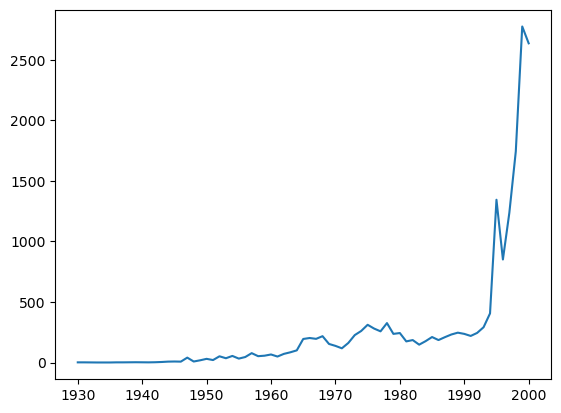

In [37]:
ufo.Year.value_counts().sort_index().plot()